# Predicting Student Perfromance Based on Socioconomic Factors

We upload the csv onto Google Colab. From there, we read the csv and convert it into a panda to read 

In [ ]:
df2 = pd.read_csv('student-mat.csv')
df2

Saving student-mat.csv to student-mat.csv


,school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
0,"GP;""F"";18;""U"";""GT3"";""A"";4;4;""at_home"";""teacher..."
1,"GP;""F"";17;""U"";""GT3"";""T"";1;1;""at_home"";""other"";..."
2,"GP;""F"";15;""U"";""LE3"";""T"";1;1;""at_home"";""other"";..."
3,"GP;""F"";15;""U"";""GT3"";""T"";4;2;""health"";""services..."
4,"GP;""F"";16;""U"";""GT3"";""T"";3;3;""other"";""other"";""h..."
...,...
390,"MS;""M"";20;""U"";""LE3"";""A"";2;2;""services"";""servic..."
391,"MS;""M"";17;""U"";""LE3"";""T"";3;1;""services"";""servic..."
392,"MS;""M"";21;""R"";""GT3"";""T"";1;1;""other"";""other"";""c..."
393,"MS;""M"";18;""R"";""LE3"";""T"";3;2;""services"";""other""..."


As per above, the conversion to the panda was not enough to organize the data, so we split the labels/features in order to accomplish such.

In [ ]:
features = []
for value in df2["school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3"]:
  feature = value.split(";")
  features.append(feature)
feature_name = "school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3".split(";")

In [ ]:
new_df = pd.DataFrame(features, columns = feature_name)
new_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,"""F""",18,"""U""","""GT3""","""A""",4,4,"""at_home""","""teacher""","""course""","""mother""",2,2,0,"""yes""","""no""","""no""","""no""","""yes""","""yes""","""no""","""no""",4,3,4,1,1,3,6,"""5""","""6""",6
1,GP,"""F""",17,"""U""","""GT3""","""T""",1,1,"""at_home""","""other""","""course""","""father""",1,2,0,"""no""","""yes""","""no""","""no""","""no""","""yes""","""yes""","""no""",5,3,3,1,1,3,4,"""5""","""5""",6
2,GP,"""F""",15,"""U""","""LE3""","""T""",1,1,"""at_home""","""other""","""other""","""mother""",1,2,3,"""yes""","""no""","""yes""","""no""","""yes""","""yes""","""yes""","""no""",4,3,2,2,3,3,10,"""7""","""8""",10
3,GP,"""F""",15,"""U""","""GT3""","""T""",4,2,"""health""","""services""","""home""","""mother""",1,3,0,"""no""","""yes""","""yes""","""yes""","""yes""","""yes""","""yes""","""yes""",3,2,2,1,1,5,2,"""15""","""14""",15
4,GP,"""F""",16,"""U""","""GT3""","""T""",3,3,"""other""","""other""","""home""","""father""",1,2,0,"""no""","""yes""","""yes""","""no""","""yes""","""yes""","""no""","""no""",4,3,2,1,2,5,4,"""6""","""10""",10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,"""M""",20,"""U""","""LE3""","""A""",2,2,"""services""","""services""","""course""","""other""",1,2,2,"""no""","""yes""","""yes""","""no""","""yes""","""yes""","""no""","""no""",5,5,4,4,5,4,11,"""9""","""9""",9
391,MS,"""M""",17,"""U""","""LE3""","""T""",3,1,"""services""","""services""","""course""","""mother""",2,1,0,"""no""","""no""","""no""","""no""","""no""","""yes""","""yes""","""no""",2,4,5,3,4,2,3,"""14""","""16""",16
392,MS,"""M""",21,"""R""","""GT3""","""T""",1,1,"""other""","""other""","""course""","""other""",1,1,3,"""no""","""no""","""no""","""no""","""no""","""yes""","""no""","""no""",5,5,3,3,3,3,3,"""10""","""8""",7
393,MS,"""M""",18,"""R""","""LE3""","""T""",3,2,"""services""","""other""","""course""","""mother""",3,1,0,"""no""","""no""","""no""","""no""","""no""","""yes""","""yes""","""no""",4,4,1,3,4,5,0,"""11""","""12""",10


In [ ]:
feature_name = "school;sex;age;Medu;Fedu;Mjob;Fjob;traveltime;studytime;failures;schoolsup;famsup;higher;internet;famrel;goout;absences;G1;G2;G3".split(";")
new_df2 = new_df[feature_name]
new_df2

,school,sex,age,Medu,Fedu,Mjob,Fjob,traveltime,studytime,failures,schoolsup,famsup,higher,internet,famrel,goout,absences,G1,G2,G3
0,GP,"""F""",18,4,4,"""at_home""","""teacher""",2,2,0,"""yes""","""no""","""yes""","""no""",4,4,6,"""5""","""6""",6
1,GP,"""F""",17,1,1,"""at_home""","""other""",1,2,0,"""no""","""yes""","""yes""","""yes""",5,3,4,"""5""","""5""",6
2,GP,"""F""",15,1,1,"""at_home""","""other""",1,2,3,"""yes""","""no""","""yes""","""yes""",4,2,10,"""7""","""8""",10
3,GP,"""F""",15,4,2,"""health""","""services""",1,3,0,"""no""","""yes""","""yes""","""yes""",3,2,2,"""15""","""14""",15
4,GP,"""F""",16,3,3,"""other""","""other""",1,2,0,"""no""","""yes""","""yes""","""no""",4,2,4,"""6""","""10""",10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,"""M""",20,2,2,"""services""","""services""",1,2,2,"""no""","""yes""","""yes""","""no""",5,4,11,"""9""","""9""",9
391,MS,"""M""",17,3,1,"""services""","""services""",2,1,0,"""no""","""no""","""yes""","""yes""",2,5,3,"""14""","""16""",16
392,MS,"""M""",21,1,1,"""other""","""other""",1,1,3,"""no""","""no""","""yes""","""no""",5,3,3,"""10""","""8""",7
393,MS,"""M""",18,3,2,"""services""","""other""",3,1,0,"""no""","""no""","""yes""","""yes""",4,1,0,"""11""","""12""",10


In [ ]:
for i in range(len(new_df2)):

  # Changes for "school"
  school_value = new_df2["school"][i]
  if school_value == "GP":
    replacement = 0
  else:
    replacement = 1
  new_df2["school"][i] = replacement

  # Changes values for Mjob and Fjob
  job_dict = {'"at_home"' : 0, '"health"' : 1, '"teacher"'  : 2, '"other"' : 3, '"services"' : 4}

  new_df2["Mjob"][i] = job_dict[new_df2["Mjob"][i]]
  new_df2["Fjob"][i] = job_dict[new_df2["Fjob"][i]]
  
  # Changes values for schoolsup famsup higher internet
  yesno_dict = {'"yes"': 1, '"no"': 0}
  new_df2["schoolsup"][i] = yesno_dict[new_df2["schoolsup"][i]]
  new_df2["famsup"][i] = yesno_dict[new_df2["famsup"][i]]
  new_df2["higher"][i] = yesno_dict[new_df2["higher"][i]]
  new_df2["internet"][i] = yesno_dict[new_df2["internet"][i]]

  sex_dict = {'"F"': 0, '"M"': 1}
  new_df2["sex"][i] = sex_dict[new_df2["sex"][i]]

  # Converts G1 and G2 back to numeric values
  new_df2["G1"][i] = int(new_df2["G1"][i][1:-1])
  new_df2["G2"][i] = int(new_df2["G2"][i][1:-1])

new_df2

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


,school,sex,age,Medu,Fedu,Mjob,Fjob,traveltime,studytime,failures,schoolsup,famsup,higher,internet,famrel,goout,absences,G1,G2,G3
0,0,0,18,4,4,0,2,2,2,0,1,0,1,0,4,4,6,5,6,6
1,0,0,17,1,1,0,3,1,2,0,0,1,1,1,5,3,4,5,5,6
2,0,0,15,1,1,0,3,1,2,3,1,0,1,1,4,2,10,7,8,10
3,0,0,15,4,2,1,4,1,3,0,0,1,1,1,3,2,2,15,14,15
4,0,0,16,3,3,3,3,1,2,0,0,1,1,0,4,2,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,2,2,4,4,1,2,2,0,1,1,0,5,4,11,9,9,9
391,1,1,17,3,1,4,4,2,1,0,0,0,1,1,2,5,3,14,16,16
392,1,1,21,1,1,3,3,1,1,3,0,0,1,0,5,3,3,10,8,7
393,1,1,18,3,2,4,3,3,1,0,0,0,1,1,4,1,0,11,12,10


In [ ]:
new_df2

,school,sex,age,Medu,Fedu,Mjob,Fjob,traveltime,studytime,failures,schoolsup,famsup,higher,internet,famrel,goout,absences,G1,G2,G3
0,0,0,18,4,4,0,2,2,2,0,1,0,1,0,4,4,6,5,6,6
1,0,0,17,1,1,0,3,1,2,0,0,1,1,1,5,3,4,5,5,6
2,0,0,15,1,1,0,3,1,2,3,1,0,1,1,4,2,10,7,8,10
3,0,0,15,4,2,1,4,1,3,0,0,1,1,1,3,2,2,15,14,15
4,0,0,16,3,3,3,3,1,2,0,0,1,1,0,4,2,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,2,2,4,4,1,2,2,0,1,1,0,5,4,11,9,9,9
391,1,1,17,3,1,4,4,2,1,0,0,0,1,1,2,5,3,14,16,16
392,1,1,21,1,1,3,3,1,1,3,0,0,1,0,5,3,3,10,8,7
393,1,1,18,3,2,4,3,3,1,0,0,0,1,1,4,1,0,11,12,10


In [ ]:
for i in range(len(new_df2)):

  # Changes for "school"
  G3 = int(new_df2["G3"][i])
  if G3 >=0 and G3 <= 9:
    replacement = 0 #Fail
  else:
    replacement = 1 #Pass
  new_df2["G3"][i] = replacement

new_df2

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


,school,sex,age,Medu,Fedu,Mjob,Fjob,traveltime,studytime,failures,schoolsup,famsup,higher,internet,famrel,goout,absences,G1,G2,G3
0,0,0,18,4,4,0,2,2,2,0,1,0,1,0,4,4,6,5,6,0
1,0,0,17,1,1,0,3,1,2,0,0,1,1,1,5,3,4,5,5,0
2,0,0,15,1,1,0,3,1,2,3,1,0,1,1,4,2,10,7,8,1
3,0,0,15,4,2,1,4,1,3,0,0,1,1,1,3,2,2,15,14,1
4,0,0,16,3,3,3,3,1,2,0,0,1,1,0,4,2,4,6,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,2,2,4,4,1,2,2,0,1,1,0,5,4,11,9,9,0
391,1,1,17,3,1,4,4,2,1,0,0,0,1,1,2,5,3,14,16,1
392,1,1,21,1,1,3,3,1,1,3,0,0,1,0,5,3,3,10,8,0
393,1,1,18,3,2,4,3,3,1,0,0,0,1,1,4,1,0,11,12,1


In [ ]:
import sklearn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

X = new_df2.loc[:, new_df2.columns!='G3']
y = new_df2["G3"].astype('int')
x_train, x_test, y_train, y_test = train_test_split(X, y)


In [ ]:
# Creating various SVC models to tune the hyperparameters
# Parameters used for hypertuning
parameters = {'C': [0.1, 1, 10, 100, 1000], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear'], 'degree': [1, 2, 3, 4]}

# Initializes Grid with the classifier used, and the parameters to hypertune
grid = GridSearchCV(SVC(), parameters)

# Trains the models with training data and finds best model
grid.fit(x_train, y_train)

# Hypertuned parameters along with the resulting accuracy
print(grid.best_params_)
print(grid.score(x_test, y_test))

{'C': 1, 'degree': 1, 'kernel': 'linear'}
0.898989898989899


In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg_model = LogisticRegression(max_iter=10000)
log_reg_model.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
pred = log_reg_model.predict(x_test)
accuracy_score(y_test, pred)

0.898989898989899

Feature: 0, Score: 0.53230
Feature: 1, Score: -0.35301
Feature: 2, Score: -0.30208
Feature: 3, Score: 0.13352
Feature: 4, Score: -0.47505
Feature: 5, Score: -0.13838
Feature: 6, Score: 0.23405
Feature: 7, Score: 0.79822
Feature: 8, Score: -0.41018
Feature: 9, Score: -0.34695
Feature: 10, Score: -0.65752
Feature: 11, Score: 0.01515
Feature: 12, Score: -0.02580
Feature: 13, Score: -0.52497
Feature: 14, Score: 0.73912
Feature: 15, Score: -0.28891
Feature: 16, Score: -0.05512
Feature: 17, Score: 0.24995
Feature: 18, Score: 2.03981


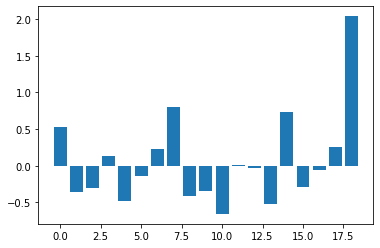

In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

importance = log_reg_model.coef_[0]
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Create first pipeline for base without reducing features.
pipe = Pipeline([('classifier' , RandomForestClassifier())])

# Create param grid.

param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l2', 'none'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['lbfgs', 'newton-cg', 'sag', 'saga'],
    'classifier__max_iter' : [5000, 10000, 15000]},
    {'classifier' : [RandomForestClassifier()],
    'classifier__n_estimators' : list(range(10,101,10)),
    'classifier__max_features' : ['auto']}
]

# Create grid search object

clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

# Fit on data

best_clf = clf.fit(x_train, y_train)
print(best_clf)

#Calculate accuracy
tuned_pred = clf.predict(x_test)
print(accuracy_score(y_test, tuned_pred))

Fitting 5 folds for each of 490 candidates, totalling 2450 fits
GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('classifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid=[{'classifier': [LogisticRegression(C=0.23357214690901212,
                                                            max_iter=5000,
                                                            solver='sag')],
                          'classifier__C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01...
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'classifier__max_iter': [5000, 10000, 15000],
                          'classifier__penalty': ['l2', 'none'],
                          'classifier__solver

Feature: 0, Score: 0.32920
Feature: 1, Score: -0.18282
Feature: 2, Score: -0.67330
Feature: 3, Score: -0.04609
Feature: 4, Score: -0.37164
Feature: 5, Score: -0.13866
Feature: 6, Score: 0.05439
Feature: 7, Score: 0.35547
Feature: 8, Score: -0.29098
Feature: 9, Score: -0.25174
Feature: 10, Score: -0.51276
Feature: 11, Score: -0.16309
Feature: 12, Score: -0.11121
Feature: 13, Score: -0.28825
Feature: 14, Score: 0.24525
Feature: 15, Score: -0.22125
Feature: 16, Score: -0.03104
Feature: 17, Score: 0.29766
Feature: 18, Score: 1.18863


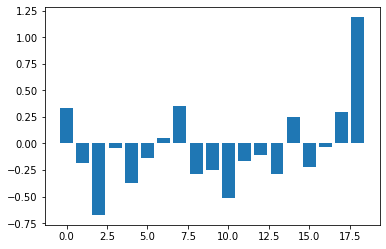

In [ ]:
importance = clf.best_estimator_[0].coef_[0]
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
!pip install skorch
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from skorch import NeuralNetClassifier

class NeuralNetwork(nn.Module):
   def __init__(self):
      super(NeuralNetwork, self).__init__()
      self.flatten = nn.Flatten()
      self.linear_relu_stack = nn.Sequential(
      nn.Linear(19, 512),
      nn.ReLU(),
      nn.Linear(512, 256),
      nn.ReLU(),
      nn.Linear(256, 128),
      nn.ReLU(),
      nn.Linear(128, 64),
      nn.ReLU(),
      nn.Linear(64, 32),
      nn.ReLU(),
      nn.Linear(32, 1), 
      nn.Sigmoid()
  )
   def forward(self, x):
      return self.linear_relu_stack(x)

In [ ]:
#training the neural network with 1 epoch and learning rate of .1 and momentum of .9
net = NeuralNetwork()
def train(net):
    optimizer = optim.SGD(net.parameters(), lr=.01, momentum=.9)
    loss = nn.BCELoss()
    x_train_arr = x_train.to_numpy().astype(np.float32)
    y_train_arr = y_train.to_numpy().astype(np.float32)
    for i in range(1):
      for j in range(len(x_train_arr)):
        optimizer.zero_grad()
        x_train_tensor = torch.from_numpy(np.asarray(x_train_arr[j]))
        pred = net(x_train_tensor)
        label = torch.from_numpy(np.asarray([np.asarray(y_train_arr[j])]))
        loss_val = loss(pred, label)
        loss_val.backward()
        optimizer.step()

train(net)

In [ ]:
x_test_arr = x_test.to_numpy().astype(np.float32)
pred = []
for j in range(len(x_test_arr)):
  x_test_tensor = torch.from_numpy(np.asarray(x_test_arr[j]))
  pred_val = net(x_test_tensor)
  if (pred_val > .5):
    pred.append(1)
  else:
    pred.append(0)

accuracy_score(y_test, pred)

In [ ]:
from torch import optim
import numpy as np
from skorch import NeuralNetClassifier

net = NeuralNetClassifier(NeuralNetwork
                         , max_epochs=10
                         , lr=0.1
                         , iterator_train__shuffle=True)
x_train_arr = x_train.to_numpy().astype(np.float32)
y_train_arr = y_train.to_numpy().astype(np.float32)
X_trf = x_train_arr
y_trf = y_train_arr.reshape(-1, 1)
net.fit(X_trf,y_trf)

In [ ]:
#tuning hyperparameters of neural network using  gridsearch
from sklearn.model_selection import GridSearchCV

params = {
    'lr': [0.001,0.005, 0.01, 0.05, 0.1, 0.2, 0.3],
    'max_epochs': [10, 20, 30, 40, 50]
}

gs = GridSearchCV(net, params, scoring='r2', verbose=1, cv=10)

gs.fit(X_trf, y_trf)
print("best score: {:.3f}, best params: {}".format(gs.best_score_, gs.best_params_))
x_test_arr = x_test.to_numpy().astype(np.float32)
y_test_arr = y_test.to_numpy().astype(np.float32)
print(gs.best_params_)
#get accuracy
print(gs.score(x_test_arr, y_test_arr))

In [ ]:
x_test_arr = x_test.to_numpy().astype(np.float32)
pred = []
for j in range(len(x_test_arr)):
  x_test_tensor = torch.from_numpy(np.asarray(x_test_arr[j]))
  pred_val = net.predict(x_test_tensor)
  if (pred_val > .5):
    pred.append(1)
  else:
    pred.append(0)

accuracy_score(y_test, pred)